# Proyek Analisis Data: E-Commerce Public

- Maulana Muhammad Ikhsan
- maulanamuhammadikh@gmail.com
- ixsannnnnn

# Pertanyaan Bisnis

- Kota mana yang masuk ke dalam 10 peringkat teratas penjualan (2016-2018)?
- Dari seluruh produk yang dijual, manakah yang paling menguntungkan pada tahun 2018?
- Growth penjualan perbulan tahun 2017?

# Import Semua Packages/Library yang Digunakan

In [ ]:
# Import libraries/packages yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar

# Data Wrangling

### Gathering Data

In [3]:
# Import semua files csv yang akan digunakan
customer_data = pd.read_csv('Data/customers_dataset.csv')
geo_data = pd.read_csv('Data/geolocation_dataset.csv')
items_data = pd.read_csv('Data/order_items_dataset.csv')
order_pay_data = pd.read_csv('Data/order_payments_dataset.csv')
order_review_data = pd.read_csv('Data/order_reviews_dataset.csv')
orders_data = pd.read_csv('Data/orders_dataset.csv')
category_data = pd.read_csv('Data/product_category_name_translation.csv')
products_data = pd.read_csv('Data/products_dataset.csv')
sellers_data = pd.read_csv('Data/sellers_dataset.csv')

In [3]:
# Melihat beberapa data yang sudah diimport
customer_data.head(3), geo_data.head(3), items_data.head(3), order_pay_data.head(3), order_review_data.head(3), orders_data.head(3), category_data.head(3), products_data.head(3), sellers_data.head(3)

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  ,
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 1                         1046       -23.546081       -46.644820   
 2                         1046       -23.546129       -46.642951   
 
   geolocation_city geolocation_state  
 0        sao paulo                SP  
 1        sao paulo                SP  
 2        sao paulo        

In [4]:
# Menggabungkan data menjadi satu dataframe besar
ecommerce_data = orders_data.merge(items_data, on='order_id', how='left')
ecommerce_data = ecommerce_data.merge(order_pay_data, on='order_id', how='outer', validate='m:m')
ecommerce_data = ecommerce_data.merge(order_review_data, on='order_id', how='outer')
ecommerce_data = ecommerce_data.merge(products_data, on='product_id', how='outer')
ecommerce_data = ecommerce_data.merge(customer_data, on='customer_id', how='outer')
ecommerce_data = ecommerce_data.merge(sellers_data, on='seller_id', how='outer')

print(ecommerce_data.shape)

(119143, 39)


Insight:
   - Import semua files yang terdapat pada e-commerce public dataset.
   - Setelah itu, menggunakan .head() untuk melihat kolom mana saja yang dapat kita merge/join.
   - Melakukan penggabungan seluruh data menjadi satu data frame yang dapat digunakan.

### Assesing Data

In [5]:
# Melihat informasi dari dataframe
ecommerce_data.info()
ecommerce_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


In [6]:
# Melihat apakah ada data yang hilang (missing values) pada dataframe
ecommerce_data.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
product_category_name              2542


In [8]:
# Melihat duplikat data pada dataframe
ecommerce_data.duplicated().sum()

np.int64(0)

Insight:
   - Setelah menggabungkan seluruh tabel menjadi 1 dataframe melakukan pengecekan masalah yang umum dijumpai
   - Ditemukan banyaknya missing value/NULL pada dataframe ecommerce_data
   - Ditemukan beberapa duplicate data pada dataframe ecommerce_data

### Cleaning Data

In [9]:
# Menghapus duplikat data pada dataframe
ecommerce_data.drop_duplicates(inplace=True)

In [10]:
# Menghitung rasio data yang hilang (missing ratio) pada dataframe
missing_ratio = ecommerce_data.isna().mean() * 100  # percentage format
print(missing_ratio.sort_values(ascending=False))

review_comment_title             88.258647
review_comment_message           57.827988
order_delivered_customer_date     2.871339
product_category_name             2.133571
product_name_lenght               2.133571
product_description_lenght        2.133571
product_photos_qty                2.133571
order_delivered_carrier_date      1.750837
review_creation_date              0.836810
review_score                      0.836810
review_id                         0.836810
review_answer_timestamp           0.836810
product_height_cm                 0.715946
product_weight_g                  0.715946
product_length_cm                 0.715946
product_width_cm                  0.715946
product_id                        0.699160
seller_city                       0.699160
seller_zip_code_prefix            0.699160
freight_value                     0.699160
seller_state                      0.699160
seller_id                         0.699160
order_item_id                     0.699160
shipping_li

In [11]:
# Menghapus NULL values dari beberapa kolom yang sekiranya dapat digunakan untuk analisis
ecommerce_data.dropna(subset= [
    'order_approved_at',
    'order_delivered_customer_date',
    'order_item_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'price',
    'freight_value',
    'payment_sequential',
    'payment_type',
    'payment_installments',
    'payment_value',
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
], inplace=True)
ecommerce_data.reset_index(drop=True, inplace=True)

print(ecommerce_data.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          1
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                           849
review_score                        849
review_comment_title             100564
review_comment_message            66697
review_creation_date                849
review_answer_timestamp             849
product_category_name                 0


Insight:
   - Menghapus duplicate_values pada dataframe
   - Menghitung persentase untuk menentukan missing values yang akan dibersihkan
   - Menghapus missing values sesuai keperluan analisis

# Exploratory Data Analysis (EDA)

### Explore

In [12]:
# Menentukan 10 kota dengan penjualan terbanyak (2016-2018)
top10_cities = ecommerce_data.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(10)
print(top10_cities)

customer_city
sao paulo         1933844.12
rio de janeiro     986652.21
belo horizonte     354842.89
brasilia           305588.55
curitiba           211495.90
campinas           192011.50
salvador           185548.46
porto alegre       184550.11
guarulhos          148530.42
niteroi            130371.81
Name: price, dtype: float64


In [13]:
# Produk mana yang paling banyak terjual pada tahun 2018?
ecommerce_data['order_approved_at'] = pd.to_datetime(ecommerce_data['order_approved_at'])
ecommerce_2018 = ecommerce_data[ecommerce_data['order_approved_at'].dt.year == 2018]
ecommerce_2018['profit'] = ecommerce_2018['price'] - ecommerce_2018['freight_value']
profitable = ecommerce_2018.groupby('product_category_name')['profit'].sum().sort_values(ascending=False).head(1)
print(profitable)

product_category_name
beleza_saude    660848.41
Name: profit, dtype: float64


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_13148\3025873443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_2018['profit'] = ecommerce_2018['price'] - ecommerce_2018['freight_value']


In [17]:
# Growth per bulan pada tahun 2017
ecommerce_data['order_approved_at'] = pd.to_datetime(ecommerce_data['order_approved_at'])
ecommerce_data['order_year'] = ecommerce_data['order_approved_at'].dt.year
ecommerce_data['order_month'] = ecommerce_data['order_approved_at'].dt.month
ecommerce_2017 = ecommerce_data[ecommerce_data['order_year'] == 2017]

penjualan_bulanan = ecommerce_2017.groupby(['order_year', 'order_month'])['price'].sum().reset_index()
penjualan_bulanan = penjualan_bulanan.sort_values(['order_year', 'order_month'])
penjualan_bulanan['mom_growth_percent'] = penjualan_bulanan['price'].pct_change() * 100
print(penjualan_bulanan)

    order_year  order_month       price  mom_growth_percent
0         2017            1   112803.01                 NaN
1         2017            2   238924.10          111.806493
2         2017            3   372973.80           56.105558
3         2017            4   348701.97           -6.507650
4         2017            5   522253.89           49.770846
5         2017            6   444283.63          -14.929570
6         2017            7   509355.72           14.646520
7         2017            8   579504.80           13.772120
8         2017            9   629608.84            8.646009
9         2017           10   666995.02            5.938001
10        2017           11  1001710.95           50.182673
11        2017           12   761193.65          -24.010649


Insight:
   - Setelah dilakukan eksplorasi pada e-commerce datasets, telah ditemukan 10 kota dengan penjualan tertinggi  menggunakan .groupby('customer_city') dengan ['price']
   - Kemudian, ditemukan dari seluruh produk mana yang paling diminati pada tahun 2018 dengan rumus mengurangi ['price'] dengan ['freight_value'] dan .groupby('product_category_name')['profit']
   - Growth MoM pada tahun 2017 menggunakan .groupby(['order_year','order_month'])['price'] dan menghitung persentasenya menggunakan ['price'].pct_change()*100

# Visualization and Explanatory Analysis

### Pertanyaan 1

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_13148\2091613795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cities.values, y=top10_cities.index, palette=colors)


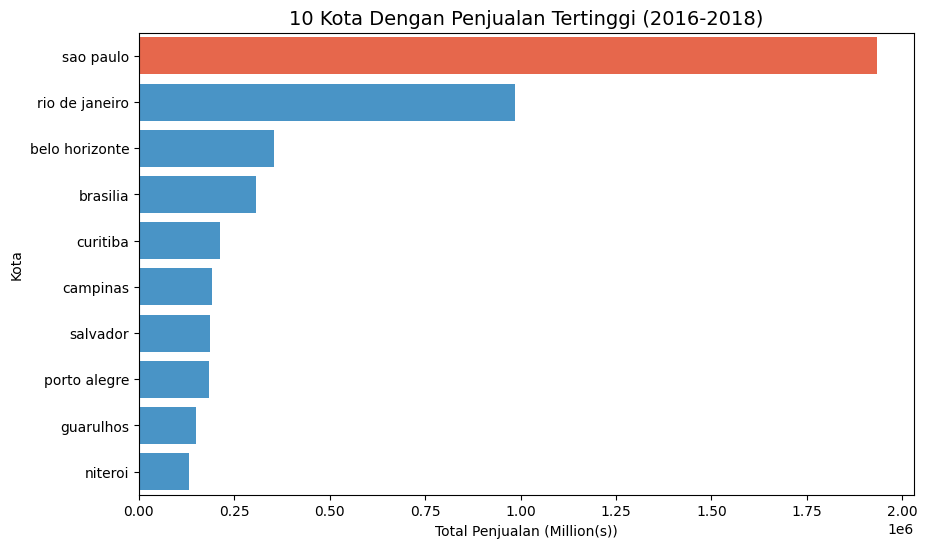

In [18]:
top10_cities = ecommerce_data.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(10)

colors = ['#FF5733'] + ['#3498DB'] * (len(top10_cities) - 1)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_cities.values, y=top10_cities.index, palette=colors)
plt.title('10 Kota Dengan Penjualan Tertinggi (2016-2018)', fontsize=14)
plt.xlabel('Total Penjualan (Million(s))')
plt.ylabel('Kota')
plt.show()

### Pertanyaan 2

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_7592\2135981019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_2018['profit'] = ecommerce_2018['price'] - ecommerce_2018['freight_value']
C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_7592\2135981019.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_profitable.index.astype(str), y=most_profitable.values, palette=colors)


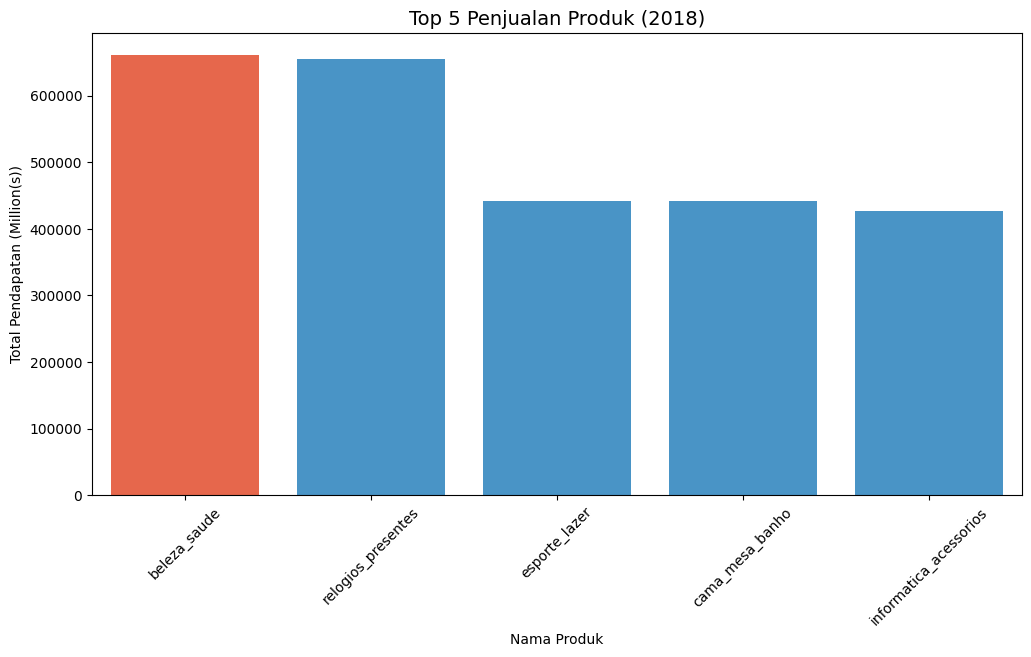

In [52]:
ecommerce_data['order_approved_at'] = pd.to_datetime(ecommerce_data['order_approved_at'])
ecommerce_2018 = ecommerce_data[ecommerce_data['order_approved_at'].dt.year == 2018]
ecommerce_2018['profit'] = ecommerce_2018['price'] - ecommerce_2018['freight_value']
most_profitable = ecommerce_2018.groupby('product_category_name')['profit'].sum().sort_values(ascending=False).head(5)

colors = ['#FF5733'] + ['#3498DB'] * (len(most_profitable) - 1)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_profitable.index.astype(str), y=most_profitable.values, palette=colors)
plt.title('Top 5 Penjualan Produk (2018)', fontsize=14)
plt.xlabel('Nama Produk')
plt.ylabel('Total Pendapatan (Million(s))')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_7592\277577777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nama_bulan, y=penjualan_bulanan['mom_growth_percent'], palette=colors)


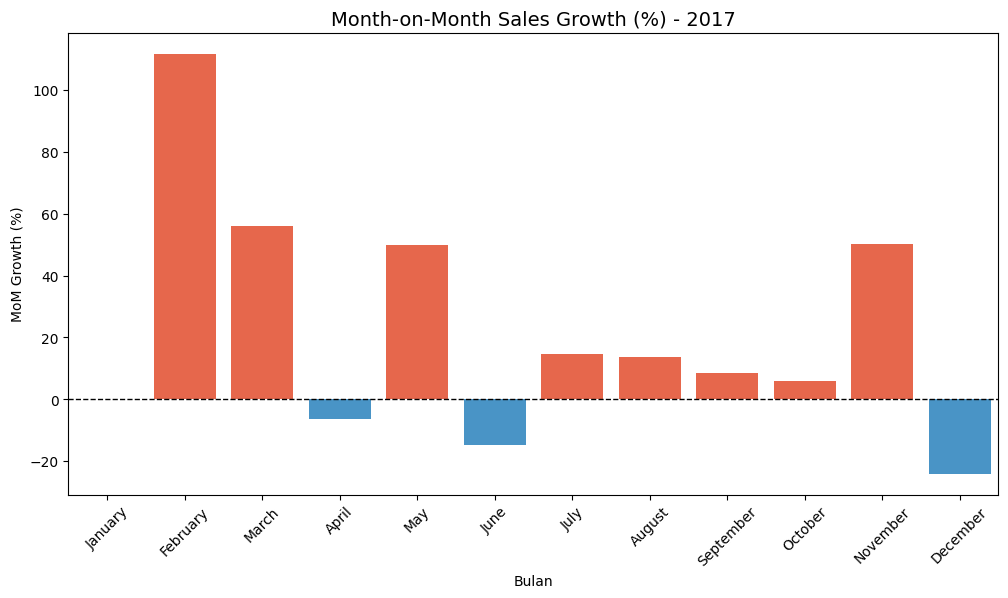

In [ ]:
ecommerce_2017 = ecommerce_data[ecommerce_data['order_year'] == 2017]
penjualan_bulanan = ecommerce_2017.groupby(['order_year', 'order_month'])['price'].sum().reset_index()
penjualan_bulanan = penjualan_bulanan.sort_values(['order_year', 'order_month'])
penjualan_bulanan['mom_growth_percent'] = penjualan_bulanan['price'].pct_change() * 100

nama_bulan = [calendar.month_name[m] for m in penjualan_bulanan['order_month']]

colors = ['#FF5733' if growth > 0 else '#3498DB' for growth in penjualan_bulanan['mom_growth_percent']]

plt.figure(figsize=(12, 6))
sns.barplot(x=nama_bulan, y=penjualan_bulanan['mom_growth_percent'], palette=colors)
plt.title('Month-on-Month Sales Growth (%) - 2017', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('MoM Growth (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Conclusion

- Untuk 10 kota dengan penjualan tertinggi yang ada didalam e-commerce dataset, ditemukan bahwa sao paulo merupakan pasar yang paling profitable dalam penjualan seluruh produk diangka R$1,933,844 (2016-2018).
- Untuk produk dengan penjualan terbanyak pada tahun 2018 yang paling profitable ada diangka R$660,848.
- Perhitungan growth% penjualan MoM sepanjang tahun 2017 ditemukan growth tertinggi ada pada bulan februari dengan persentasi mencapai 112% growth.

In [20]:
# Menyimpan file yang akand digunakan untuk dimasukan ke dashboard Streamlit
ecommerce_data.to_csv("ecommerce_cleaned.csv", index=False)